In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\nito8\AppData\Local\Temp\ipykernel_15100\1664236919.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="max")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-11-11,26.199986,26.341225,26.182331,26.270605,88900,25.308220,NaN,NaN,NaN
1993-11-12,26.323576,26.411851,26.235301,26.252956,108200,25.317935,1.0,0.004717,0.004717
1993-11-15,26.305935,26.376555,26.235315,26.376555,243300,25.326696,1.0,0.004044,0.004044
1993-11-16,26.429499,26.447154,26.252949,26.358879,492600,25.335814,1.0,0.008760,0.008760
1993-11-17,26.288263,26.447158,26.217643,26.447158,39600,25.342926,1.0,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,581.402497,1.0,22.745815,2.585641
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,581.699825,1.0,22.825203,2.597629
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,582.005058,1.0,22.971005,2.619645


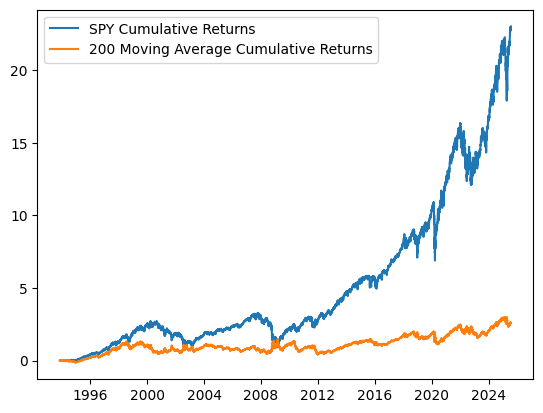

In [2]:
TICKER = 'SPY'
WINDOW = 200

def get_data():
    df = yf.download(TICKER, period="max")
    df.columns = df.columns.get_level_values(0)

    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

C:\Users\nito8\AppData\Local\Temp\ipykernel_15100\1256946776.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download([ticker, cash_ticker], period="max")['Close'].ffill()
[*********************100%***********************]  2 of 2 completed


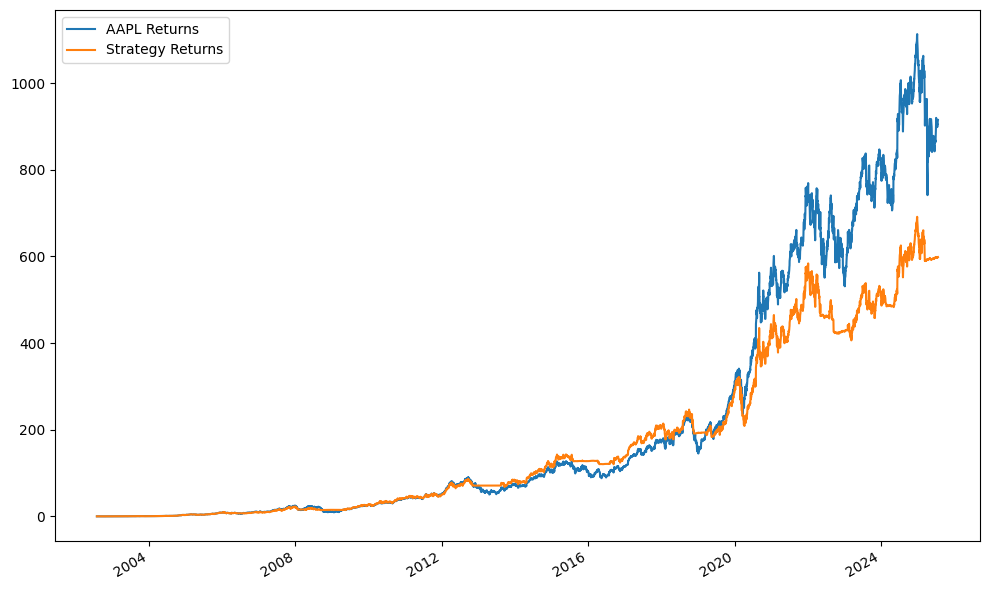

Ticker,AAPL,SHY,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,
2002-07-30,0.231868,53.068947,0.324517,0.0,0.000000,0.000000
2002-07-31,0.229313,53.232708,0.324310,0.0,-0.011018,0.003086
2002-08-01,0.222401,53.337486,0.324071,0.0,-0.040829,0.005060
2002-08-02,0.217142,53.442368,0.323803,0.0,-0.063513,0.007037
2002-08-05,0.210229,53.527443,0.323578,0.0,-0.093327,0.008640
...,...,...,...,...,...,...
2025-07-15,209.110001,82.379997,222.233988,0.0,900.848234,597.141505
2025-07-16,210.160004,82.489998,222.156903,0.0,905.376680,597.940193
2025-07-17,210.020004,82.459999,222.073388,0.0,904.772892,597.722379


In [4]:
WINDOW = 200
LOOKBACK = 10000
TICKER = 'AAPL'
CASH_TICKER = 'SHY'

def get_data(ticker = TICKER, cash_ticker=CASH_TICKER, lookback = LOOKBACK):
    df = yf.download([ticker, cash_ticker], period="max")['Close'].ffill()
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_moving_average(df, ticker=TICKER, window=WINDOW):
    df[f'{window}_ma'] = df[ticker].rolling(window).mean()

    return df.dropna()

def add_strategy(df, ticker=TICKER, window=WINDOW):
    df['Strategy'] = np.where(df[ticker] > df[f'{window}_ma'], 1, 0)
    df['Strategy'] = df['Strategy'].shift(1).fillna(0)
    return df

def test_strategy(df, ticker=TICKER, cash_ticker=CASH_TICKER):
    asset_ret = df[ticker].pct_change().fillna(0)
    cash_ret  = df[cash_ticker].pct_change().fillna(0)

    strat_daily = np.where(
        df['Strategy'] == 0,
        cash_ret,
        df['Strategy'] * asset_ret
    )

    df['Asset_Returns']    = (1 + asset_ret).cumprod() - 1
    df['Strategy_Returns'] = (1 + strat_daily).cumprod() - 1

    plt.figure(figsize=(10, 6))
    plt.plot(df['Asset_Returns'],    label=f"{ticker} Returns")
    plt.plot(df['Strategy_Returns'], label="Strategy Returns")
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_average(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()